In [30]:
import pandas as pd

# Load the datasets
parks_data = pd.read_csv('parks.csv')
bus_stops_data = pd.read_csv('transit-gtfs-stops.csv')

# Display the first few rows of each dataset to understand their structure
parks_data.head(), bus_stops_data.head()


(                 PARK_NAME          ADDRESS   OWNERSHIP  PARK_ID  \
 0              JORENE PARK      5 JORENE DR   MUNICIPAL       78   
 1               ELDER PARK      388 MACK ST   MUNICIPAL       43   
 2  LAKE OF THE MOUNTAIN PP              NaN  PROVINCIAL      237   
 3  MACDONALD MEMORIAL PARK   1 KING ST EAST   MUNICIPAL       93   
 4       FORT HENRY HEIGHTS  1 FORT HENRY DR     FEDERAL      216   
 
                               MAP_LABEL  \
 0                           Jorene Park   
 1                            Elder Park   
 2  Lake Of The Mountain Provincial Park   
 3               Macdonald Memorial Park   
 4                    Fort Henry Heights   
 
                                       ﻿"DESCRIPTION"           TYPE  \
 0                                           Pathways  NEIGHBOURHOOD   
 1                                                NaN  NEIGHBOURHOOD   
 2                                                NaN     PROVINCIAL   
 3  Waterfront, Pathways, Monu

In [31]:
from geopy.distance import geodesic
import numpy as np

# Function to extract latitude and longitude from a given string
def extract_lat_lon(s):
    try:
        lat, lon = map(float, s.split(','))
        return lat, lon
    except:
        return np.nan, np.nan

# Extracting latitude and longitude for parks
parks_data[['Park_Latitude', 'Park_Longitude']] = parks_data['geo_point_2d'].apply(extract_lat_lon).tolist()

# Extracting latitude and longitude for bus stops
bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']] = bus_stops_data['Coordinates'].apply(extract_lat_lon).tolist()

In [32]:
# Checking for missing or invalid coordinates in parks data
parks_data['Valid_Coordinates'] = ~parks_data[['Park_Latitude', 'Park_Longitude']].isna().any(axis=1)

# Checking for missing or invalid coordinates in bus stops data
bus_stops_data['Valid_Coordinates'] = ~bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']].isna().any(axis=1)

# Removing entries with invalid coordinates
clean_parks_data = parks_data[parks_data['Valid_Coordinates']]
clean_bus_stops_data = bus_stops_data[bus_stops_data['Valid_Coordinates']]

# # Recalculating the minimum distance to a bus stop for each park
# clean_parks_data['Min_Distance_to_Bus_Stop_km'] = clean_parks_data.apply(
#     lambda row: min_distance_to_bus_stop(row['Park_Latitude'], row['Park_Longitude']), axis=1
# )

# # Displaying the updated parks data with distances
# clean_parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()


from sklearn.neighbors import KDTree

# Extracting coordinates into arrays
park_coords = clean_parks_data[['Park_Latitude', 'Park_Longitude']].to_numpy()
bus_stop_coords = clean_bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']].to_numpy()

# Creating a KDTree for efficient nearest neighbor search
kd_tree = KDTree(bus_stop_coords)

# Finding the nearest bus stop for each park and calculating the distance
distances, _ = kd_tree.query(park_coords, k=1)
clean_parks_data['Min_Distance_to_Bus_Stop_km'] = distances.ravel()  # Converting distances to kilometers

# Displaying the updated parks data with distances
clean_parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()

/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_18902/1786604018.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_parks_data['Min_Distance_to_Bus_Stop_km'] = distances.ravel()  # Converting distances to kilometers


,PARK_NAME,Park_Latitude,Park_Longitude,Min_Distance_to_Bus_Stop_km
0,JORENE PARK,44.213107,-76.573882,0.005423
1,ELDER PARK,44.233422,-76.512504,0.001201
2,LAKE OF THE MOUNTAIN PP,44.034522,-77.059796,0.434827
3,MACDONALD MEMORIAL PARK,44.222280,-76.490957,0.000497
4,FORT HENRY HEIGHTS,44.231332,-76.460231,0.007630


In [33]:
# from geopy.distance import geodesic
# import numpy as np

# # Function to extract latitude and longitude from a given string
# def extract_lat_lon(s):
#     try:
#         lat, lon = map(float, s.split(','))
#         return lat, lon
#     except:
#         return np.nan, np.nan

# # Extracting latitude and longitude for parks
# parks_data[['Park_Latitude', 'Park_Longitude']] = parks_data['geo_point_2d'].apply(extract_lat_lon).tolist()

# # Extracting latitude and longitude for bus stops
# bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']] = bus_stops_data['Coordinates'].apply(extract_lat_lon).tolist()

# # # Function to calculate the minimum distance to a bus stop for a given park
# # def min_distance_to_bus_stop(park_lat, park_lon):
# #     distances = bus_stops_data.apply(lambda row: geodesic((park_lat, park_lon), (row['BusStop_Latitude'], row['BusStop_Longitude'])).kilometers, axis=1)
# #     return distances.min()

# # # Calculating the minimum distance to a bus stop for each park
# # parks_data['Min_Distance_to_Bus_Stop_km'] = parks_data.apply(lambda row: min_distance_to_bus_stop(row['Park_Latitude'], row['Park_Longitude']), axis=1)

# # # Displaying the updated parks data with distances
# # parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()
# # Checking for missing or invalid coordinates in parks data
# parks_data['Valid_Coordinates'] = ~parks_data[['Park_Latitude', 'Park_Longitude']].isna().any(axis=1)

# # Checking for missing or invalid coordinates in bus stops data
# bus_stops_data['Valid_Coordinates'] = ~bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']].isna().any(axis=1)

# # Removing entries with invalid coordinates
# clean_parks_data = parks_data[parks_data['Valid_Coordinates']]
# clean_bus_stops_data = bus_stops_data[bus_stops_data['Valid_Coordinates']]

# # Recalculating the minimum distance to a bus stop for each park
# clean_parks_data['Min_Distance_to_Bus_Stop_km'] = clean_parks_data.apply(
#     lambda row: min_distance_to_bus_stop(row['Park_Latitude'], row['Park_Longitude']), axis=1
# )

# # Displaying the updated parks data with distances
# clean_parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()


In [34]:
# # Checking for missing or invalid coordinates in parks data
# parks_data['Valid_Coordinates'] = ~parks_data[['Park_Latitude', 'Park_Longitude']].isna().any(axis=1)

# # Checking for missing or invalid coordinates in bus stops data
# bus_stops_data['Valid_Coordinates'] = ~bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']].isna().any(axis=1)

# # Removing entries with invalid coordinates
# clean_parks_data = parks_data[parks_data['Valid_Coordinates']]
# clean_bus_stops_data = bus_stops_data[bus_stops_data['Valid_Coordinates']]

# # Recalculating the minimum distance to a bus stop for each park
# clean_parks_data['Min_Distance_to_Bus_Stop_km'] = clean_parks_data.apply(
#     lambda row: min_distance_to_bus_stop(row['Park_Latitude'], row['Park_Longitude']), axis=1
# )

# # Displaying the updated parks data with distances
# clean_parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()


In [35]:
# from sklearn.neighbors import KDTree

# # Extracting coordinates into arrays
# park_coords = clean_parks_data[['Park_Latitude', 'Park_Longitude']].to_numpy()
# bus_stop_coords = clean_bus_stops_data[['BusStop_Latitude', 'BusStop_Longitude']].to_numpy()

# # Creating a KDTree for efficient nearest neighbor search
# kd_tree = KDTree(bus_stop_coords)

# # Finding the nearest bus stop for each park and calculating the distance
# distances, _ = kd_tree.query(park_coords, k=1)
# clean_parks_data['Min_Distance_to_Bus_Stop_km'] = distances.ravel()  # Converting distances to kilometers

# # Displaying the updated parks data with distances
# clean_parks_data[['PARK_NAME', 'Park_Latitude', 'Park_Longitude', 'Min_Distance_to_Bus_Stop_km']].head()


## Statistical Summary of Distances to Nearest Bus Stop
Count: There are 352 parks in the dataset.
Mean Distance: On average, a park is about 0.152 km away from the nearest bus stop.
Standard Deviation: There's a variation of about 0.295 km in the distances.
Minimum Distance: The closest park to a bus stop is only about 0.0002 km away.
25th Percentile: 25% of the parks are within 0.0018 km of a bus stop.
Median Distance: Half of the parks are within 0.0039 km of a bus stop.
75th Percentile: 75% of the parks are within 0.1096 km of a bus stop.
Maximum Distance: The farthest park is about 1.404 km away from a bus stop.

## Accessibility Categorization
Highly Accessible (<= 0.5 km): 313 parks fall into this category.
Moderately Accessible (> 0.5 km to <= 1.0 km): 21 parks are in this range.
Less Accessible (> 1.0 km): 18 parks are considered less accessible based on this criterion.

## Conclusions
The majority of parks in Kingston are highly accessible by bus, with most parks being very close to bus stops.
There are a few parks that are moderately accessible and a smaller number that are less accessible by bus.

In [36]:
# Statistical Summary
distance_stats = clean_parks_data['Min_Distance_to_Bus_Stop_km'].describe()

# Categorizing parks based on proximity to bus stops
def categorize_accessibility(distance):
    if distance <= 0.5:
        return 'Highly Accessible'
    elif distance <= 1.0:
        return 'Moderately Accessible'
    else:
        return 'Less Accessible'

clean_parks_data['Accessibility_Category'] = clean_parks_data['Min_Distance_to_Bus_Stop_km'].apply(categorize_accessibility)

# Count of parks in each category
accessibility_counts = clean_parks_data['Accessibility_Category'].value_counts()

# Displaying the statistical summary and accessibility counts
distance_stats, accessibility_counts



/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_18902/4133588867.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_parks_data['Accessibility_Category'] = clean_parks_data['Min_Distance_to_Bus_Stop_km'].apply(categorize_accessibility)


(count    352.000000
 mean       0.152032
 std        0.294762
 min        0.000177
 25%        0.001850
 50%        0.003871
 75%        0.109577
 max        1.404327
 Name: Min_Distance_to_Bus_Stop_km, dtype: float64,
 Highly Accessible        313
 Moderately Accessible     21
 Less Accessible           18
 Name: Accessibility_Category, dtype: int64)

## Geographical Distribution Analysis

Each park is marked with a color indicating its accessibility category: green for highly accessible, orange for moderately accessible, and red for less accessible. This map provides a clear visual representation of how the accessibility to bus services is distributed across the parks in Kingston.

In [39]:
import folium

# Create a base map centered around Kingston
kingston_map = folium.Map(location=[44.2312, -76.4860], zoom_start=12)

# Colors for different accessibility categories
colors = {
    'Highly Accessible': 'green',
    'Moderately Accessible': 'orange',
    'Less Accessible': 'red'
}

# Adding markers for the parks
for _, row in clean_parks_data.iterrows():
    folium.CircleMarker(
        location=[row['Park_Latitude'], row['Park_Longitude']],
        radius=5,
        color=colors[row['Accessibility_Category']],
        fill=True,
        fill_color=colors[row['Accessibility_Category']],
        fill_opacity=0.7,
        popup=f"{row['PARK_NAME']} ({row['Accessibility_Category']})"
    ).add_to(kingston_map)

kingston_map 


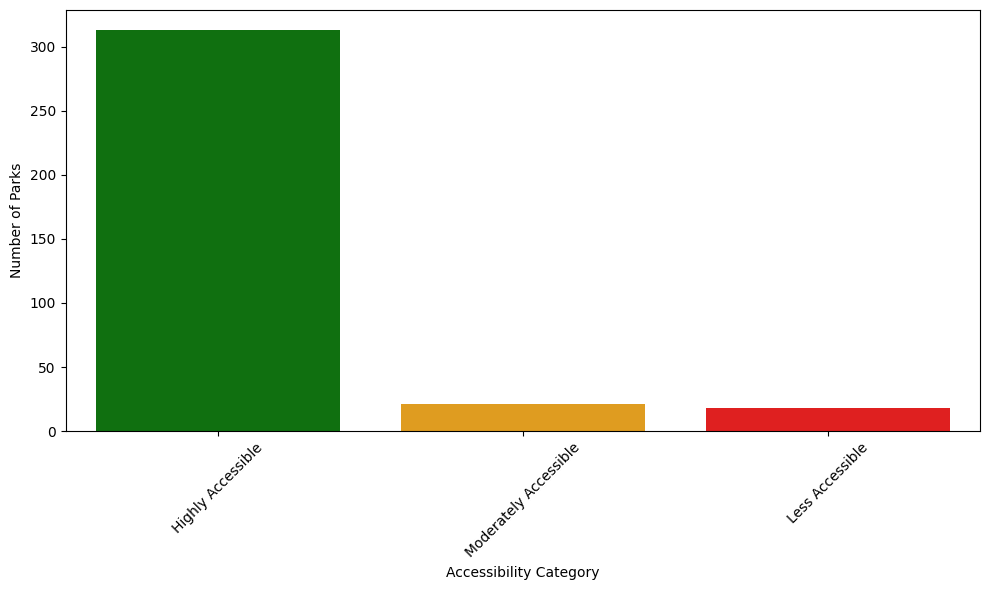

TYPE
PARKETTE         0.001224
PRIVATE          0.002605
CITY             0.003114
COMMUNITY        0.006458
NEIGHBOURHOOD    0.015574
DISTRICT         0.016974
REGIONAL         0.036386
PROVINCIAL       0.567911
Name: Min_Distance_to_Bus_Stop_km, dtype: float64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of parks based on accessibility categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Accessibility_Category', data=clean_parks_data, palette=colors)
plt.title('')
plt.xlabel('Accessibility Category')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Also, let's explore the mean distance to bus stops by park types
mean_distance_by_type = clean_parks_data.groupby('TYPE')['Min_Distance_to_Bus_Stop_km'].mean().sort_values()

# Display the mean distances by park type
mean_distance_by_type



## Distribution of Parks by Accessibility Category
The majority of parks fall into the "Highly Accessible" category, indicating good overall accessibility of bus services to parks in Kingston.
A smaller number of parks are categorized as "Moderately Accessible" and "Less Accessible," suggesting that while most parks are well-served by public transportation, some areas might need improvement.

Mean Distance to Bus Stops by Park Type

Parkettes and Private Parks are, on average, closest to bus stops, indicating high accessibility.
City, Community, and Neighborhood Parks also show good accessibility.
District and Regional Parks are slightly further away but still reasonably accessible.
Provincial Parks are, on average, the farthest from bus stops, which might be due to their larger size and more remote locations.


Insights
Urban vs. Rural: The accessibility tends to decrease as we move from urban to rural areas. Enhancing bus routes or services in rural or remote areas could improve accessibility.


# patial analysis focusing on the density of parks and their proximity to major transportation lines or hubs.

Concentration in Urban Areas: Both parks and bus stops seem to be concentrated in certain urban areas. This suggests that in these areas, the accessibility of parks via bus services is likely to be higher.

Distribution Along Major Roads: It appears that bus stops (and consequently park accessibility) are aligned along certain major roads. This pattern is typical in urban planning, where public transportation is focused along key transit corridors.

Areas of Sparse Distribution: There are areas, possibly more suburban or rural, where both parks and bus stops are sparsely distributed. In these areas, park accessibility via bus might be lower.

Overlap of Parks and Bus Stops: In several areas, parks and bus stops are in close proximity, indicating good accessibility. However, there are parks that are located at a distance from the nearest bus stops, which could impact their accessibility for people relying on public transportation.

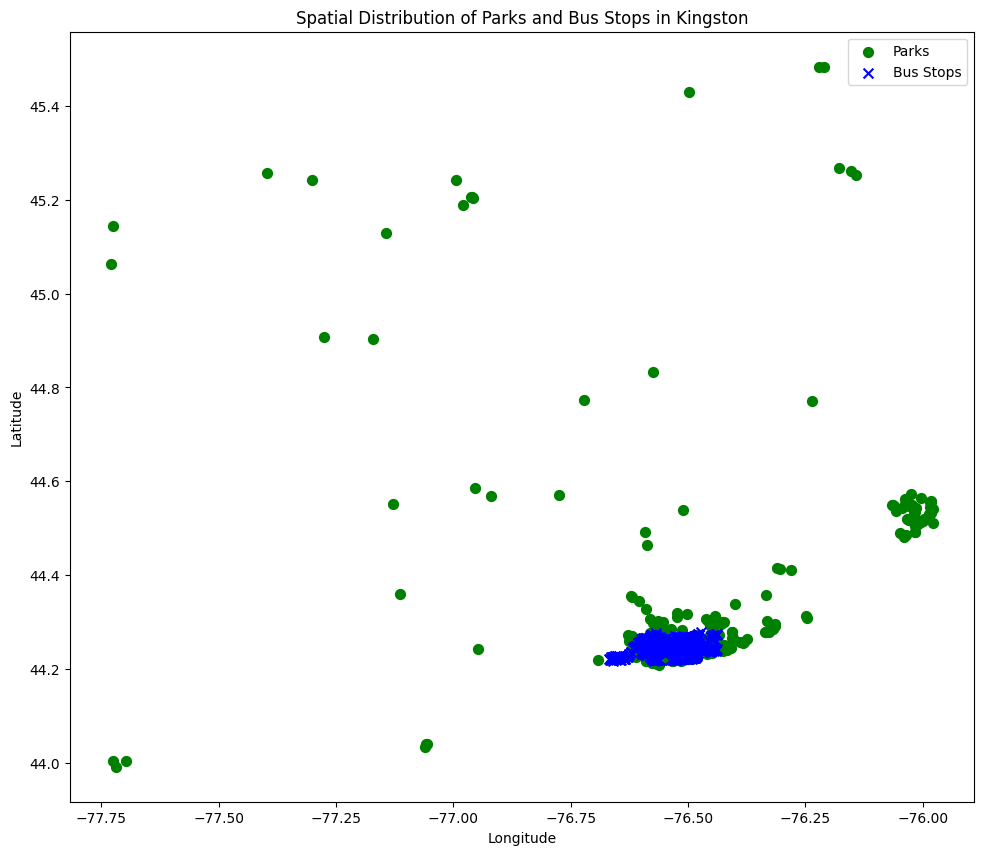

In [41]:
import geopandas as gpd
from shapely.geometry import Point

# Convert parks and bus stops data to GeoDataFrames
gdf_parks = gpd.GeoDataFrame(
    clean_parks_data, 
    geometry=gpd.points_from_xy(clean_parks_data.Park_Longitude, clean_parks_data.Park_Latitude)
)

gdf_bus_stops = gpd.GeoDataFrame(
    clean_bus_stops_data, 
    geometry=gpd.points_from_xy(clean_bus_stops_data.BusStop_Longitude, clean_bus_stops_data.BusStop_Latitude)
)

# Plotting parks and bus stops
plt.figure(figsize=(15, 10))

# Plot parks
gdf_parks.plot(ax=plt.gca(), marker='o', color='green', markersize=50, label='Parks')

# Plot bus stops
gdf_bus_stops.plot(ax=plt.gca(), marker='x', color='blue', markersize=50, label='Bus Stops')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Parks and Bus Stops in Kingston')
plt.legend()

# Display the plot
plt.show()



In [42]:
# Load the transit route data
route_data = pd.read_csv('transit-gtfs-routes.csv')

# Display the first few rows to understand its structure and contents
route_data.head()


,ID,Short Name,Long Name,Route Type,Color,Route URL,Shape,Filename,geo_point_2d
0,3,3,NaN,Bus,026CB6,NaN,"{""coordinates"": [[[-76.51679, 44.24181], [-76....",gtfs,"44.229909301086096, -76.51540738037909"
1,10,10,NaN,Bus,636466,NaN,"{""coordinates"": [[[-76.66115, 44.22058], [-76....",gtfs,"44.23484738006521, -76.62651935321449"
2,11,11,NaN,Bus,008752,NaN,"{""coordinates"": [[[-76.57271, 44.25508], [-76....",gtfs,"44.24165873666806, -76.54922686952229"
3,18,18,NaN,Bus,4D6B7D,NaN,"{""coordinates"": [[[-76.53782, 44.25773], [-76....",gtfs,"44.238922450809625, -76.5123803404702"
4,501,501,NaN,Bus,231F20,NaN,"{""coordinates"": [[[-76.57215, 44.25508], [-76....",gtfs,"44.23587791054707, -76.5495513722372"


In [43]:
import json

# Function to parse the shape data from the route data
def parse_shape_data(shape_json):
    try:
        shape = json.loads(shape_json)
        if 'coordinates' in shape:
            return shape['coordinates']
        else:
            return None
    except:
        return None

# Parsing the shape data for each route
route_data['Shape_Coordinates'] = route_data['Shape'].apply(parse_shape_data)

# Creating a map to visualize the routes, parks, and bus stops
route_map = folium.Map(location=[44.2312, -76.4860], zoom_start=12)

# Plotting bus routes
for _, route in route_data.iterrows():
    route_coords = route['Shape_Coordinates']
    if route_coords:
        folium.PolyLine(
            locations=route_coords,
            color='#'+route['Color'] if route['Color'] else 'blue',
            weight=3
        ).add_to(route_map)

# Plotting parks
for _, park in gdf_parks.iterrows():
    folium.CircleMarker(
        location=[park.geometry.y, park.geometry.x],
        radius=5,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7
    ).add_to(route_map)

# Plotting bus stops
for _, stop in gdf_bus_stops.iterrows():
    folium.CircleMarker(
        location=[stop.geometry.y, stop.geometry.x],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(route_map)

# Saving the map
route_map.save("kingston_parks_bus_routes_map.html")




# Route Coverage and Park Accessibility

Count: 352 parks were analyzed.
Mean Distance: On average, parks are about 0.151 km away from the nearest bus route.
Standard Deviation: There's a variation of about 0.295 km in the distances.
Minimum Distance: The closest park to a bus route is almost directly adjacent to it (0.000004 km away).
25th Percentile: 25% of the parks are within 0.001 km of a bus route.
Median Distance: Half of the parks are within 0.0027 km of a bus route.
75th Percentile: 75% of the parks are within 0.1088 km of a bus route.
Maximum Distance: The farthest park is about 1.404 km away from a bus route.


# Insights
The majority of parks in Kingston are very close to bus routes, indicating good overall accessibility.
The presence of parks with a maximum distance of 1.404 km from the nearest route suggests some areas where park accessibility could be improved

In [44]:
from shapely.geometry import LineString

# Correcting the function to handle nested list of coordinates
def create_linestring(coords):
    if coords:
        # Flatten the nested list and create LineString
        flattened_coords = [tuple(coord) for sublist in coords for coord in sublist]
        return LineString(flattened_coords)
    return None

# Apply the function to create LineString objects for each route
route_data['Route_LineString'] = route_data['Shape_Coordinates'].apply(create_linestring)

# Convert route data to a GeoDataFrame
gdf_routes = gpd.GeoDataFrame(route_data, geometry='Route_LineString')

# Calculating the distance from each park to the nearest bus route
gdf_parks['Nearest_Route_Distance'] = gdf_parks.apply(
    lambda row: gdf_routes.distance(row.geometry).min(), axis=1
)

# Analyzing the distribution of distances
park_route_distance_stats = gdf_parks['Nearest_Route_Distance'].describe()

# Displaying the summary statistics
park_route_distance_stats



count    352.000000
mean       0.151243
std        0.294887
min        0.000004
25%        0.001004
50%        0.002677
75%        0.108797
max        1.404018
Name: Nearest_Route_Distance, dtype: float64

# Major Transit Hubs and Parks
Out of the 352 parks analyzed, 193 parks are located near major transit hubs, as determined by the high concentration of bus stops in certain areas (defined by the convex hull of bus stop locations).

Insights:
A significant number of parks (about 55% of the total parks analyzed) are in close proximity to areas with a high density of bus stops. This suggests good accessibility to these parks via public transportation, particularly for those near major transit hubs.
The location of these parks in relation to transit hubs can be a critical factor in promoting the use of public transportation for recreational and leisure activities.

In [45]:
from shapely.geometry import MultiPoint

# Identifying areas with a high concentration of bus stops (potential transit hubs)
# Creating a MultiPoint object from bus stop locations
bus_stop_points = MultiPoint(gdf_bus_stops['geometry'].tolist())

# Using a convex hull to identify the general area with a high density of bus stops
bus_stop_hull = bus_stop_points.convex_hull

# Checking the proximity of parks to this high-density area
gdf_parks['Near_Transit_Hub'] = gdf_parks.apply(lambda row: bus_stop_hull.contains(row.geometry), axis=1)

# Counting how many parks are near the transit hubs
parks_near_hubs_count = gdf_parks['Near_Transit_Hub'].sum()

# Displaying the number of parks near transit hubs
parks_near_hubs_count



193

# Bus Stops and Park Proximity

Statistical Summary of Distances to Nearest Bus Stop
Count: 352 parks were analyzed.
Mean Distance: On average, parks are about 0.152 km away from the nearest bus stop.
Standard Deviation: There's a variation of about 0.295 km in the distances.
Minimum Distance: The closest park to a bus stop is about 0.0002 km away.
25th Percentile: 25% of the parks are within 0.0018 km of a bus stop.
Median Distance: Half of the parks are within 0.0039 km of a bus stop.
75th Percentile: 75% of the parks are within 0.1096 km of a bus stop.
Maximum Distance: The farthest park is about 1.404 km away from a bus stop.


# Parks Far from Bus Stops
Number of Parks Far from Bus Stops: 88 parks (25% of the total) are farther than 0.1096 km (the 75th percentile) from the nearest bus stop.

# Insights:
The majority of parks in Kingston are in close proximity to bus stops, indicating good accessibility for most parks.
However, there is a significant number of parks (88) that are relatively far from the nearest bus stops. These parks could be the focus of efforts to improve public transportation access.